<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Algorithmic Trading

## With Machine & Deep Learning

**Reading Data, Backtesting, Random Walks, Prediction with ML & DL**

**_ODSC Europe 2017_**

Dr. Yves J. Hilpisch

The Python Quants GmbH

**12. October 2017**

<img src="http://hilpisch.com/images/finaince_visual_low.png" width=50% align=left>

## The Imports

In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline
%config InlineBackend.figure_format='retina'

# If not using a GPU on a Tensorflow-GPU installation
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## The Data

In [2]:
starting_date = '01/01/2014'

data = pd.read_csv('../data/eurusd.csv')
data

,Date,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
0,6/3/2007,21:00:00,1.34456,1.34986,1.34316,1.34886,1.34474,1.35004,1.34334,1.34904,5259
1,6/4/2007,21:00:00,1.34886,1.35536,1.34876,1.35226,1.34904,1.35554,1.34894,1.35244,6110
2,6/5/2007,21:00:00,1.35226,1.35376,1.34846,1.35026,1.35244,1.35394,1.34864,1.35044,5875
3,6/6/2007,21:00:00,1.35026,1.35116,1.34216,1.34326,1.35044,1.35134,1.34234,1.34344,7361
4,6/7/2007,21:00:00,1.34326,1.34356,1.33196,1.33676,1.34344,1.34374,1.33214,1.33694,8238
5,6/10/2007,21:00:00,1.33676,1.33716,1.33326,1.33566,1.33694,1.33734,1.33344,1.33584,5492
6,6/11/2007,21:00:00,1.33566,1.33686,1.33006,1.33006,1.33584,1.33704,1.33024,1.33024,5755
7,6/12/2007,21:00:00,1.33006,1.33146,1.32626,1.33106,1.33024,1.33164,1.32644,1.33124,8570
8,6/13/2007,21:00:00,1.33106,1.33236,1.32786,1.33106,1.33124,1.33254,1.32804,1.33124,5409
9,6/14/2007,21:00:00,1.33106,1.33856,1.33046,1.33796,1.33124,1.33874,1.33064,1.33814,5252


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 11 columns):
Date          2820 non-null object
Time          2820 non-null object
OpenBid       2820 non-null float64
HighBid       2820 non-null float64
LowBid        2820 non-null float64
CloseBid      2820 non-null float64
OpenAsk       2820 non-null float64
HighAsk       2820 non-null float64
LowAsk        2820 non-null float64
CloseAsk      2820 non-null float64
TotalTicks    2820 non-null int64
dtypes: float64(8), int64(1), object(2)
memory usage: 242.4+ KB


In [4]:
data.describe()

,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
count,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,1.293295,1.299118,1.287461,1.293211,1.293644,1.299309,1.287647,1.293557,120967.249291
std,0.135032,0.135789,0.134108,0.135063,0.134927,0.135746,0.134084,0.134955,100892.744468
min,1.038540,1.041740,1.033970,1.038540,1.039140,1.041890,1.034110,1.039140,1.000000
25%,1.139163,1.144373,1.134983,1.138970,1.139935,1.144645,1.135447,1.139883,56594.000000
50%,1.317935,1.323820,1.311635,1.317765,1.318120,1.323960,1.311825,1.318080,91728.000000
75%,1.379158,1.383298,1.374000,1.378930,1.379432,1.383418,1.374112,1.379415,163147.250000
max,1.599070,1.603750,1.586520,1.599070,1.599230,1.603870,1.586650,1.599230,701333.000000


In [5]:
data['Time'].value_counts()

21:00:00    1847
22:00:00     973
Name: Time, dtype: int64

In [6]:
data = pd.read_csv('../data/eurusd.csv', index_col='Date', parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2007-06-03 to 2017-05-31
Data columns (total 10 columns):
Time          2820 non-null object
OpenBid       2820 non-null float64
HighBid       2820 non-null float64
LowBid        2820 non-null float64
CloseBid      2820 non-null float64
OpenAsk       2820 non-null float64
HighAsk       2820 non-null float64
LowAsk        2820 non-null float64
CloseAsk      2820 non-null float64
TotalTicks    2820 non-null int64
dtypes: float64(8), int64(1), object(1)
memory usage: 242.3+ KB


In [7]:
close_features = ['CloseAsk', 'CloseBid']
data = data[close_features]

In [8]:
data = data[data.index > starting_date]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2014-01-02 to 2017-05-31
Data columns (total 2 columns):
CloseAsk    1060 non-null float64
CloseBid    1060 non-null float64
dtypes: float64(2)
memory usage: 24.8 KB


## SMA-Based Strategy

Simple moving averages.

### Formulation of a Trading Strategy

In [9]:
data['Mid'] = data.mean(axis=1)

In [10]:
data.head()

,CloseAsk,CloseBid,Mid
Date,,,
2014-01-02,1.35931,1.35886,1.359085
2014-01-04,1.35965,1.35905,1.359350
2014-01-05,1.36286,1.36270,1.362780
2014-01-06,1.36163,1.36148,1.361555
2014-01-07,1.35755,1.35748,1.357515


In [11]:
data['SMA1'] = data['Mid'].rolling(10).mean() 
data.head(15)

,CloseAsk,CloseBid,Mid,SMA1
Date,,,,
2014-01-02,1.35931,1.35886,1.359085,NaN
2014-01-04,1.35965,1.35905,1.359350,NaN
2014-01-05,1.36286,1.36270,1.362780,NaN
2014-01-06,1.36163,1.36148,1.361555,NaN
2014-01-07,1.35755,1.35748,1.357515,NaN
2014-01-08,1.36068,1.36069,1.360685,NaN
2014-01-09,1.36701,1.36667,1.366840,NaN
2014-01-11,1.36815,1.36755,1.367850,NaN
2014-01-12,1.36718,1.36705,1.367115,NaN


In [12]:
data['SMA2'] = data['Mid'].rolling(60).mean() 

In [13]:
data.dropna(inplace=True)
data.head()

,CloseAsk,CloseBid,Mid,SMA1,SMA2
Date,,,,,
2014-03-12,1.38705,1.38661,1.386830,1.383361,1.367326
2014-03-13,1.39184,1.39050,1.391170,1.385129,1.367861
2014-03-15,1.39136,1.39040,1.390880,1.386785,1.368387
2014-03-16,1.39228,1.39211,1.392195,1.388671,1.368877
2014-03-17,1.39346,1.39330,1.393380,1.389401,1.369407


We end up with `SMA1` (10 days moving average) and `SMA2` (60 days moving average).

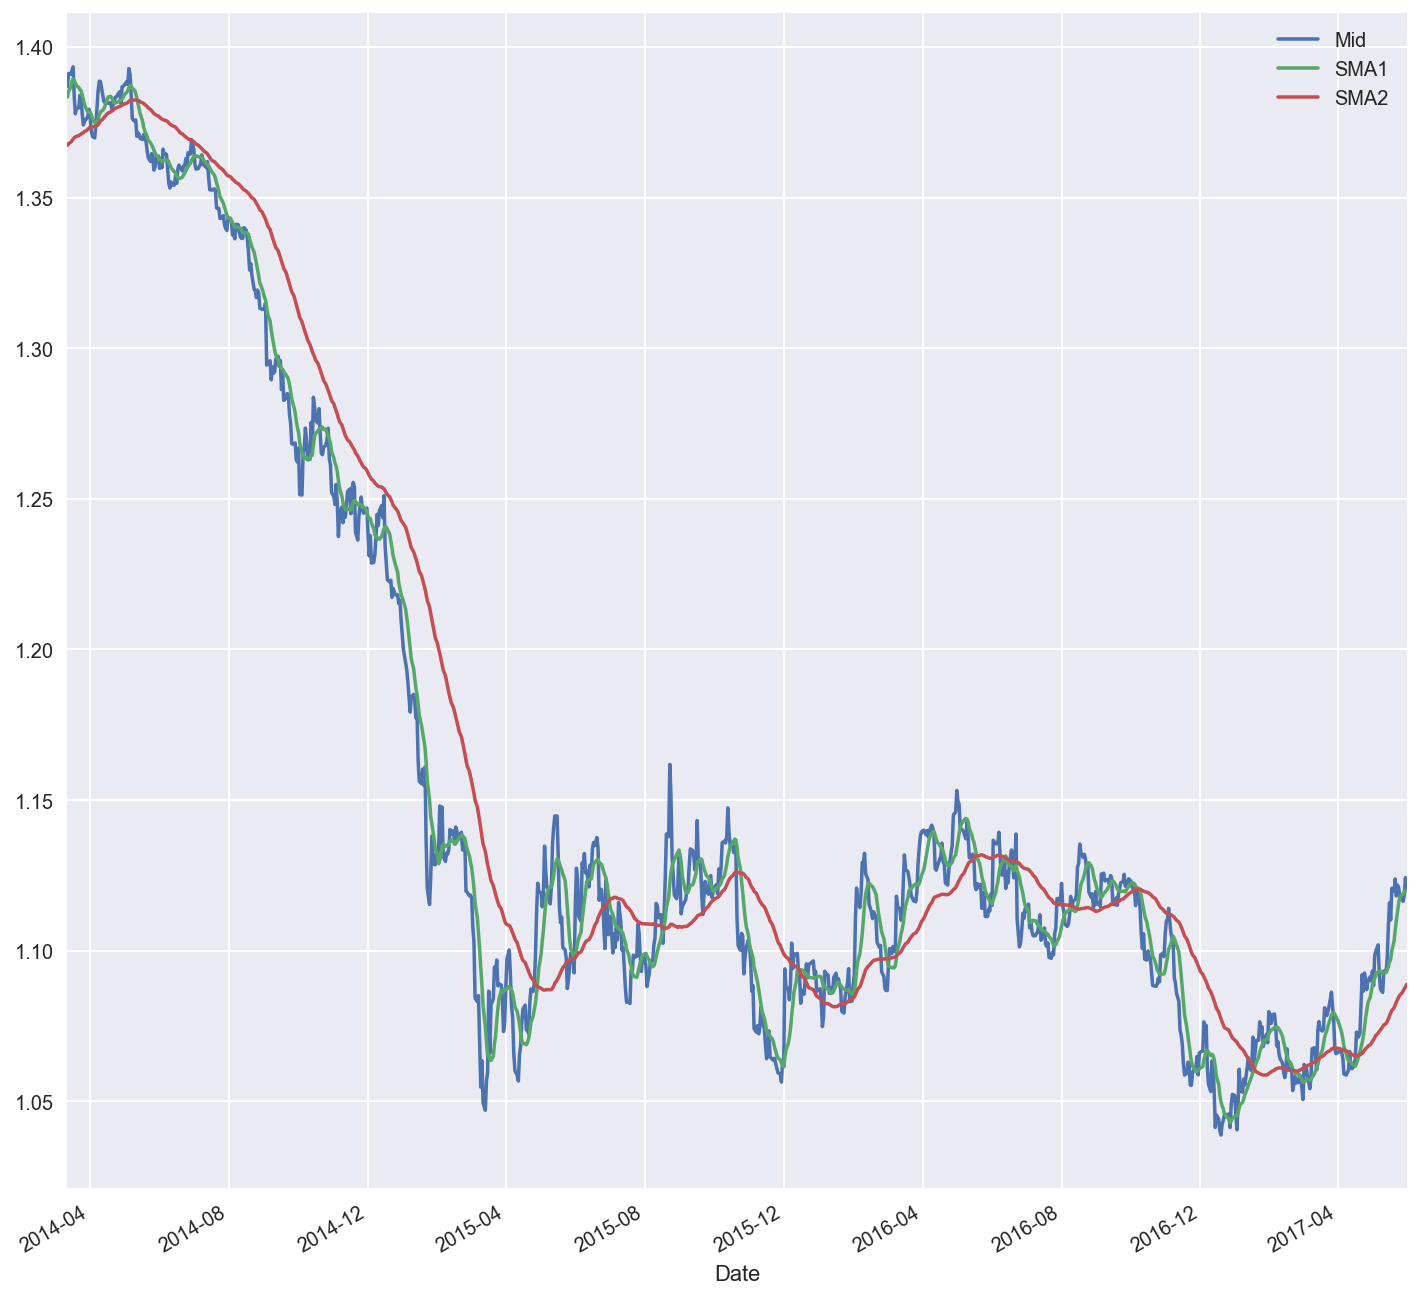

In [14]:
data[['Mid', 'SMA1', 'SMA2']].plot(figsize=(12,12));

The simples strategy is to change go long when the short term moving average is above the long term moving average, and otherwise go short.

In [15]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

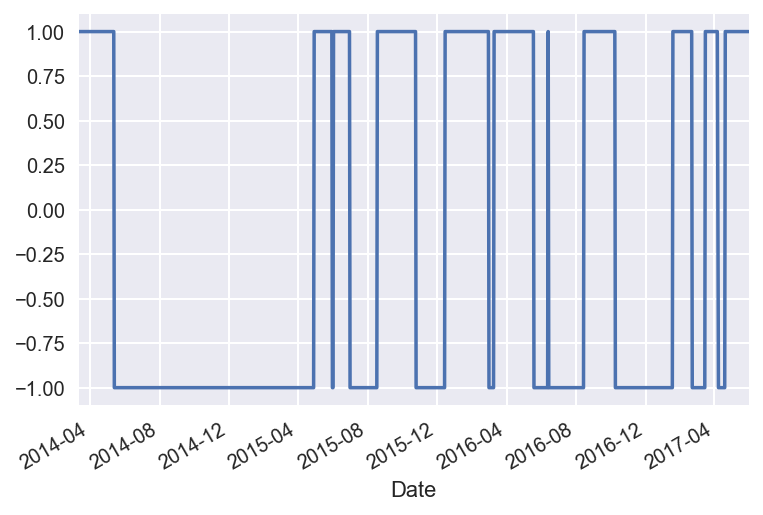

In [16]:
data['Position'].plot();

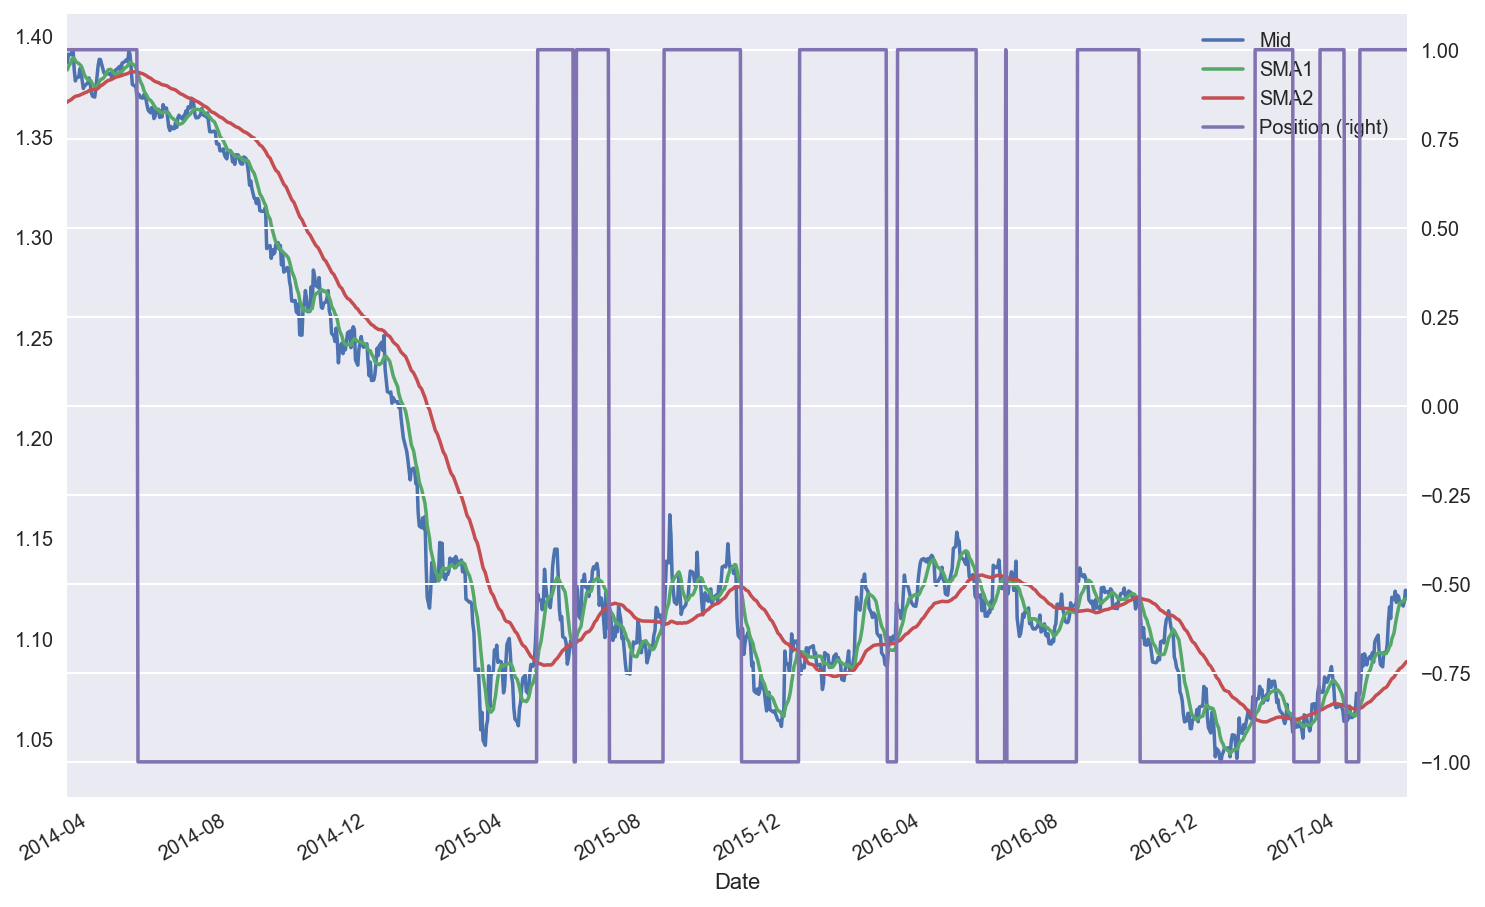

In [17]:
data[['Mid', 'SMA1', 'SMA2', 'Position']].plot(figsize=(12,8), secondary_y='Position');

The position could be considered a trading signal.

### Backtesting of the strategy

We can check how well we would have done in the past based on this strategy. The logarithmic returns are used, comparing the mean price for two consecutive days. Due to using the logarithm, it can be formulated as a division.

These returns would be the result of being long on the value.

In [18]:
data['Returns'] = np.log(data['Mid'] / data['Mid'].shift(1))
data.dropna(inplace=True)

The shift in the `Position` is due to the strategy being determined and fixed for a day based on the previous day closing data.

In [19]:
data['Strategy'] = data['Returns'] * data['Position'].shift(1)
data.dropna(inplace=True)

Alternatively, both returns and predicted returns based on the strategy can be calculated with a minimal removal of data points. 

In [ ]:
data['Returns'] = np.log(data['Mid'] / data['Mid'].shift(1))
data['Strategy'] = data['Returns'] * data['Position'].shift(1)
data.dropna(inplace=True)

In [20]:
data

,CloseAsk,CloseBid,Mid,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,,,
2014-03-15,1.39136,1.39040,1.390880,1.386785,1.368387,1,-0.000208,-0.000208
2014-03-16,1.39228,1.39211,1.392195,1.388671,1.368877,1,0.000945,0.000945
2014-03-17,1.39346,1.39330,1.393380,1.389401,1.369407,1,0.000851,0.000851
2014-03-18,1.38338,1.38321,1.383295,1.388929,1.369837,1,-0.007264,-0.007264
2014-03-19,1.37791,1.37774,1.377825,1.387957,1.370123,1,-0.003962,-0.003962
2014-03-20,1.38034,1.37860,1.379470,1.387140,1.370333,1,0.001193,0.001193
2014-03-22,1.37988,1.37962,1.379750,1.386514,1.370531,1,0.000203,0.000203
2014-03-23,1.38399,1.38381,1.383900,1.385869,1.370811,1,0.003003,0.003003
2014-03-24,1.38276,1.38258,1.382670,1.385453,1.371057,1,-0.000889,-0.000889


In [21]:
data['Strategy'].sum()

0.11854898352532442

In [22]:
data[['Returns', 'Strategy']].sum()

Returns    -0.215763
Strategy    0.118549
dtype: float64

Transforming that into a percentage.

In [23]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     0.805926
Strategy    1.125862
dtype: float64

The aggregated returns evolving in time.

In [24]:
data[['Returns', 'Strategy']].cumsum()

,Returns,Strategy
Date,,
2014-03-15,-0.000208,-0.000208
2014-03-16,0.000737,0.000737
2014-03-17,0.001587,0.001587
2014-03-18,-0.005677,-0.005677
2014-03-19,-0.009639,-0.009639
2014-03-20,-0.008446,-0.008446
2014-03-22,-0.008243,-0.008243
2014-03-23,-0.005240,-0.005240
2014-03-24,-0.006129,-0.006129


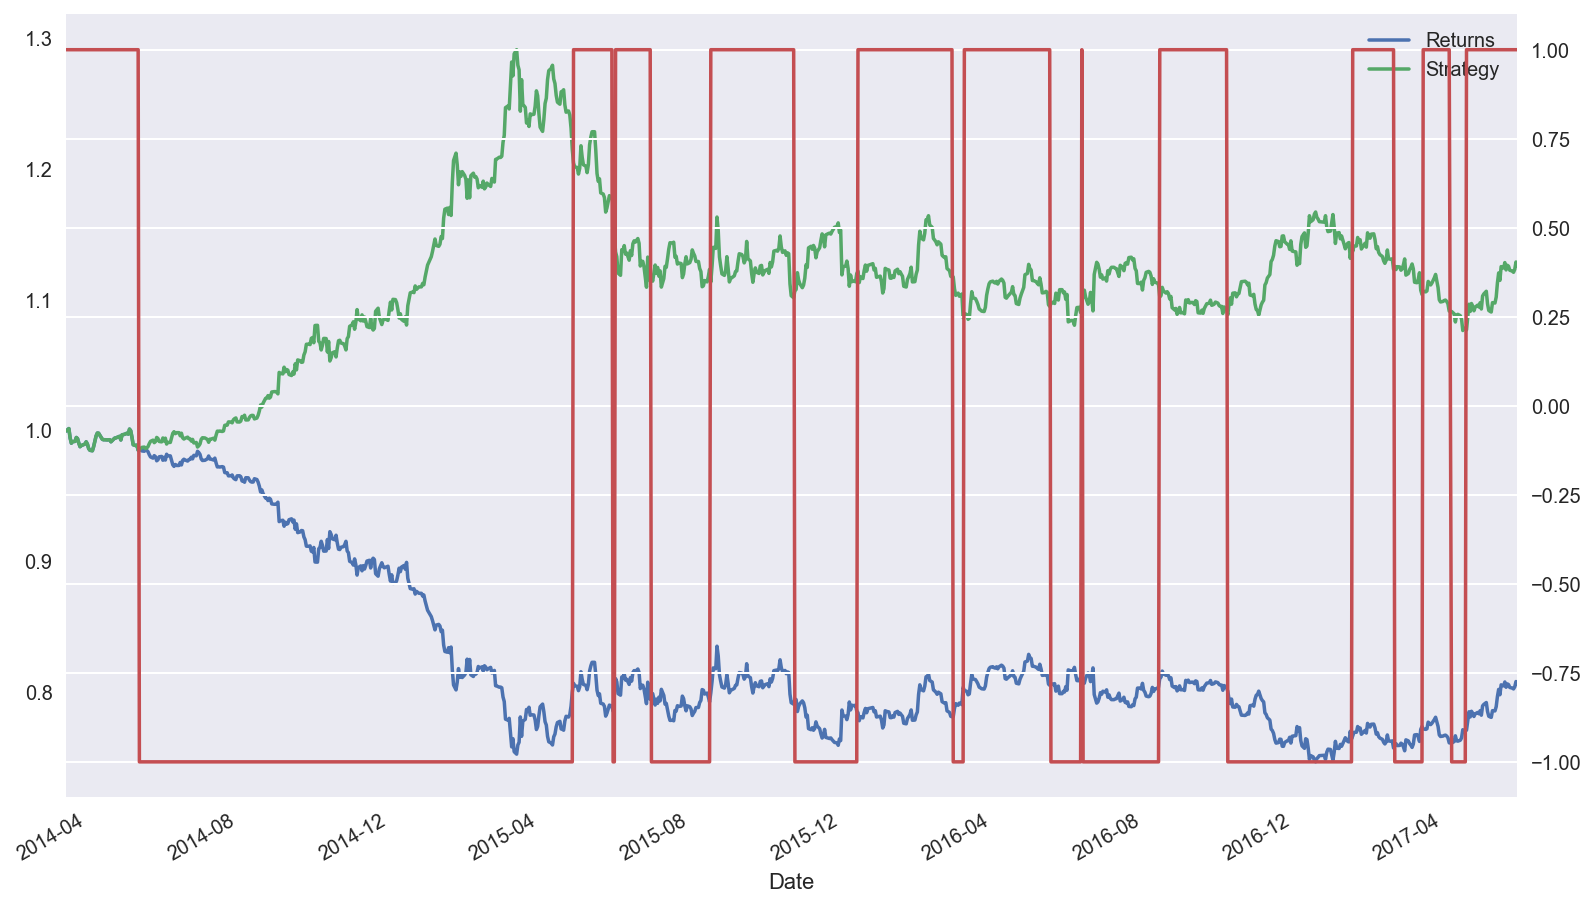

In [25]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(13,8));
data['Position'].plot(ax=ax, secondary_y='Position');

## Random Walk Hypothesis

The price doesn't change radically, but it is related to the price in previous days. The random walk hypothesis says that other than that nothing else can be predicted (and the price can go up or down at random).

### Simulating a Random Walk 

In [26]:
S0 = 100
T = 1.0
sigma = 0.2 # volatility
M = 200 # number of time intervals
dt = T / M # length of the time interval

Let's generate `10` random noise series.

In [27]:
rn = np.random.standard_normal((M+1, 10))
rn

array([[-0.62171095,  0.82645357,  0.8840202 , ..., -0.07703914,
        -0.87929588, -0.33650999],
       [-0.13252359, -0.41375191,  0.81612789, ..., -2.04287614,
        -0.70956218, -0.96761897],
       [-0.77354777,  0.82781071, -1.34415875, ...,  0.98046131,
        -1.70205205,  0.7698878 ],
       ..., 
       [ 0.63873678,  0.90400318,  0.55911821, ...,  0.05998297,
         0.61522959, -1.08326852],
       [ 0.57228553,  0.54434864,  2.41290246, ...,  0.76876487,
         0.849808  ,  1.68488187],
       [ 0.51749793, -0.57365929,  0.65594413, ...,  1.37068685,
         2.50415733, -0.23274014]])

In [28]:
print(rn.mean())
print(rn.std())

0.0164330015871
1.00398381604


The first point is a given, therefore we disable all randomness there.

In [29]:
rn[0] = 0.0

In [30]:
S = S0 * np.exp((-0.5 * sigma**2) * dt +
               sigma * rn.cumsum(axis=0) * dt ** 0.5)

We remove randomness again for the first point.

In [31]:
S[0] = S0

In [32]:
S

array([[ 100.        ,  100.        ,  100.        , ...,  100.        ,
         100.        ,  100.        ],
       [  99.80277808,   99.40663385,  101.1507499 , ...,   97.14255653,
          98.99164587,   98.63103683],
       [  98.71692411,  100.57722715,   99.24610773, ...,   98.49889909,
          96.63730149,   99.71078492],
       ..., 
       [ 106.10132239,  130.09721486,  103.93862029, ...,   81.41180938,
         104.74241813,  106.39561224],
       [ 106.96352075,  131.10260093,  107.54658787, ...,   82.30174562,
         106.0088176 ,  108.96123379],
       [ 107.74920758,  130.04329875,  108.54888017, ...,   83.91268192,
         109.83029569,  108.60318372]])

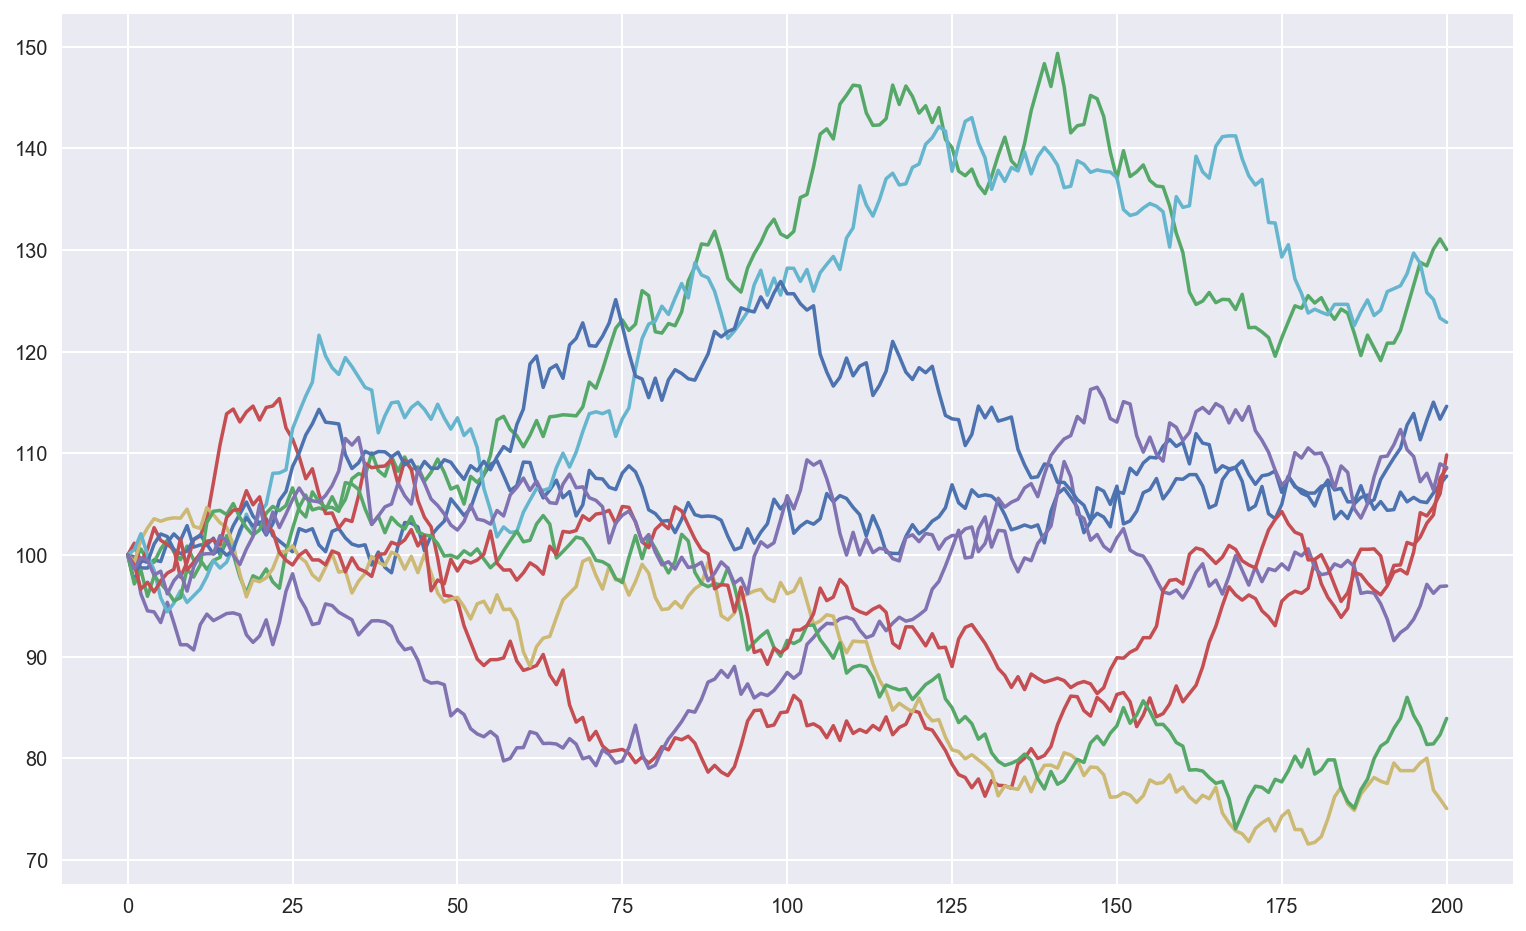

In [33]:
plt.figure(figsize=(13,8))
plt.plot(S);

If we focus on a single random walk...

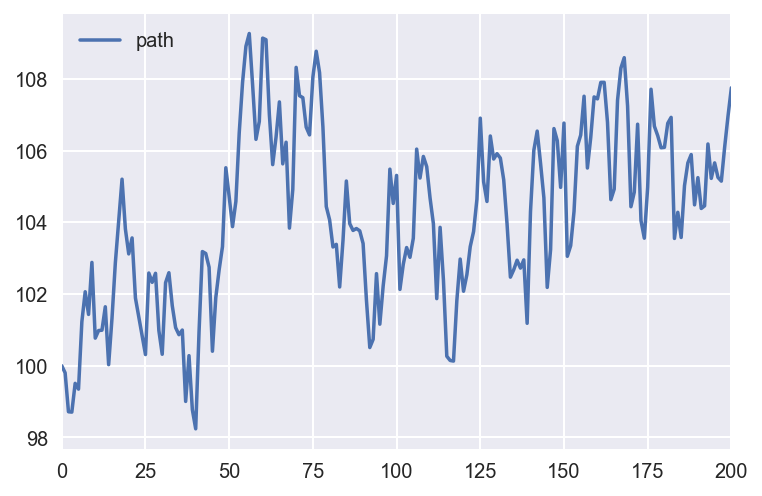

In [34]:
df = pd.DataFrame(S[:, 0], columns=['path'])
df.plot();

And create 5 time shifted seris (`Lag_*`)...

In [35]:
cols = []
lags = 5
for lag in range(1, lags+1):
    col = "Lag_{}".format(lag)
    df[col] = df['path'].shift(lag)
    cols.append(col)

In [36]:
df.head(10)

,path,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
0,100.000000,NaN,NaN,NaN,NaN,NaN
1,99.802778,100.000000,NaN,NaN,NaN,NaN
2,98.716924,99.802778,100.000000,NaN,NaN,NaN
3,98.707784,98.716924,99.802778,100.000000,NaN,NaN
4,99.509110,98.707784,98.716924,99.802778,100.000000,NaN
5,99.348057,99.509110,98.707784,98.716924,99.802778,100.000000
6,101.227632,99.348057,99.509110,98.707784,98.716924,99.802778
7,102.063419,101.227632,99.348057,99.509110,98.707784,98.716924
8,101.430560,102.063419,101.227632,99.348057,99.509110,98.707784
9,102.880450,101.430560,102.063419,101.227632,99.348057,99.509110


In [37]:
df.dropna(inplace=True)

Determine the regression values via least-squares solution.

In [38]:
reg = np.linalg.lstsq(df[cols], df['path'])
reg

(array([ 0.9052999 , -0.11721266,  0.03766145, -0.00149426,  0.17630273]),
 array([ 326.65377262]),
 5,
 array([ 3261.64495027,    26.4932863 ,    17.90503401,    11.90363095,
            9.62065342]))

We can see that the largest coeffient is the one corresponding to the first lag (the day before), even if there is some influence from previous days.

In [39]:
reg = reg[0]

In [40]:
df['Pred'] = np.dot(df[cols], reg)

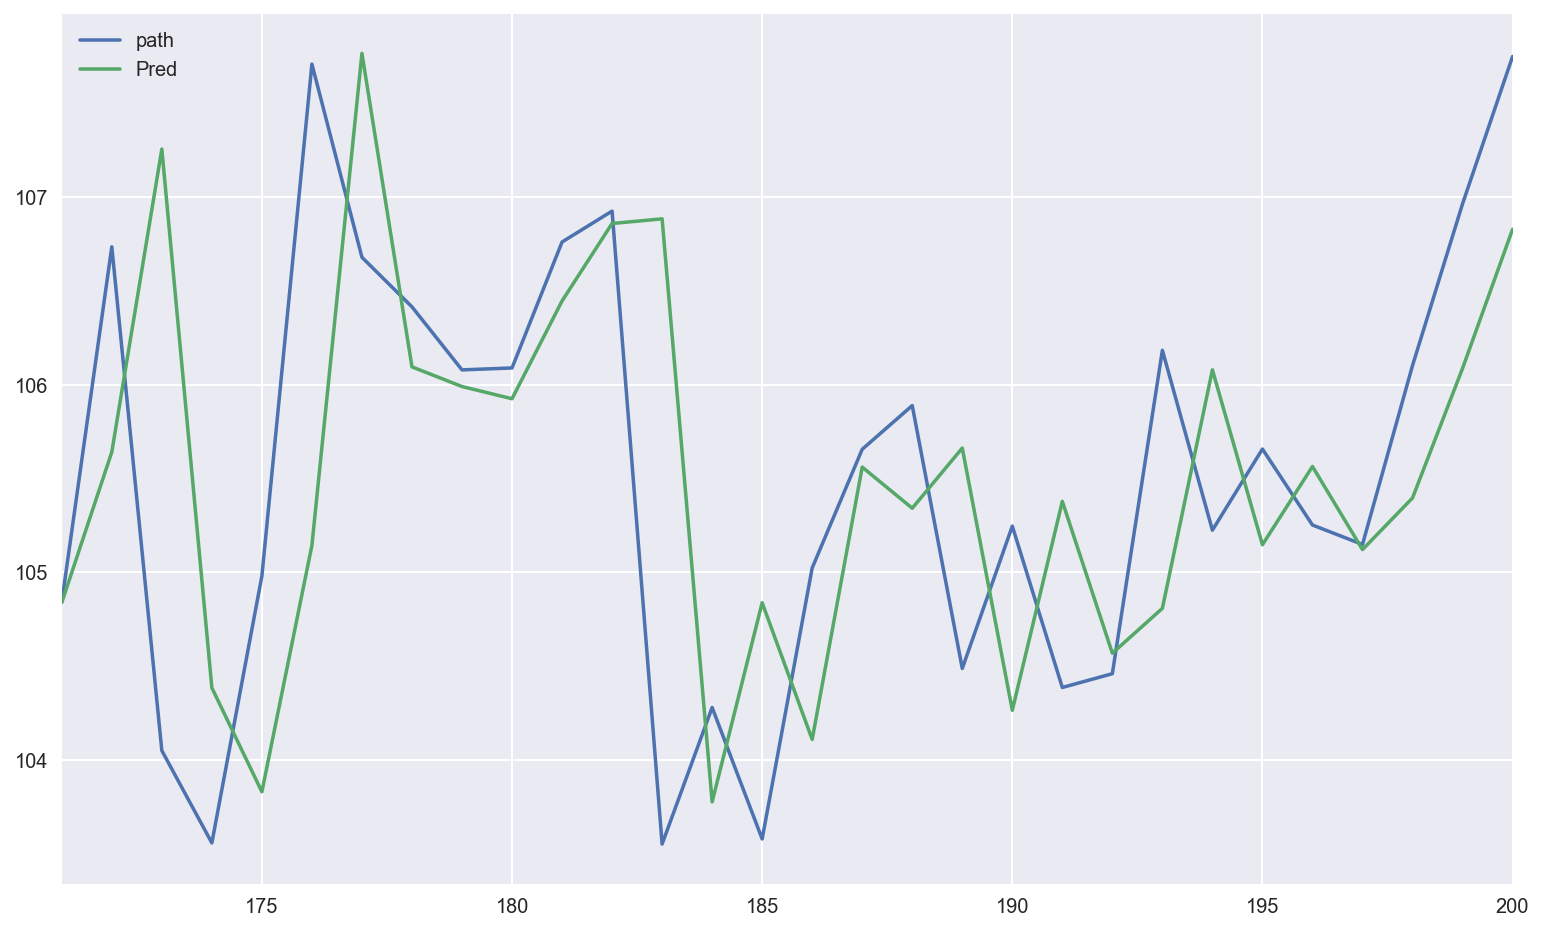

In [41]:
df[['path', 'Pred']].iloc[-30:].plot(figsize=(13,8));

This is the result of trying to predict prices based on previous days from a known random walk distribution. Time to check with real financial data.

### Real Financial Data

In [42]:
df = pd.DataFrame(data['Mid'])
df.columns = ['path']

In [43]:
cols = []
lags = 5
for lag in range(1, lags+1):
    col = "Lag_{}".format(lag)
    df[col] = df['path'].shift(lag)
    cols.append(col)

In [44]:
df.dropna(inplace=True)

In [45]:
reg = np.linalg.lstsq(df[cols], df['path'])[0]
reg

array([ 0.97040629,  0.03050355, -0.03712151,  0.04227878, -0.00633419])

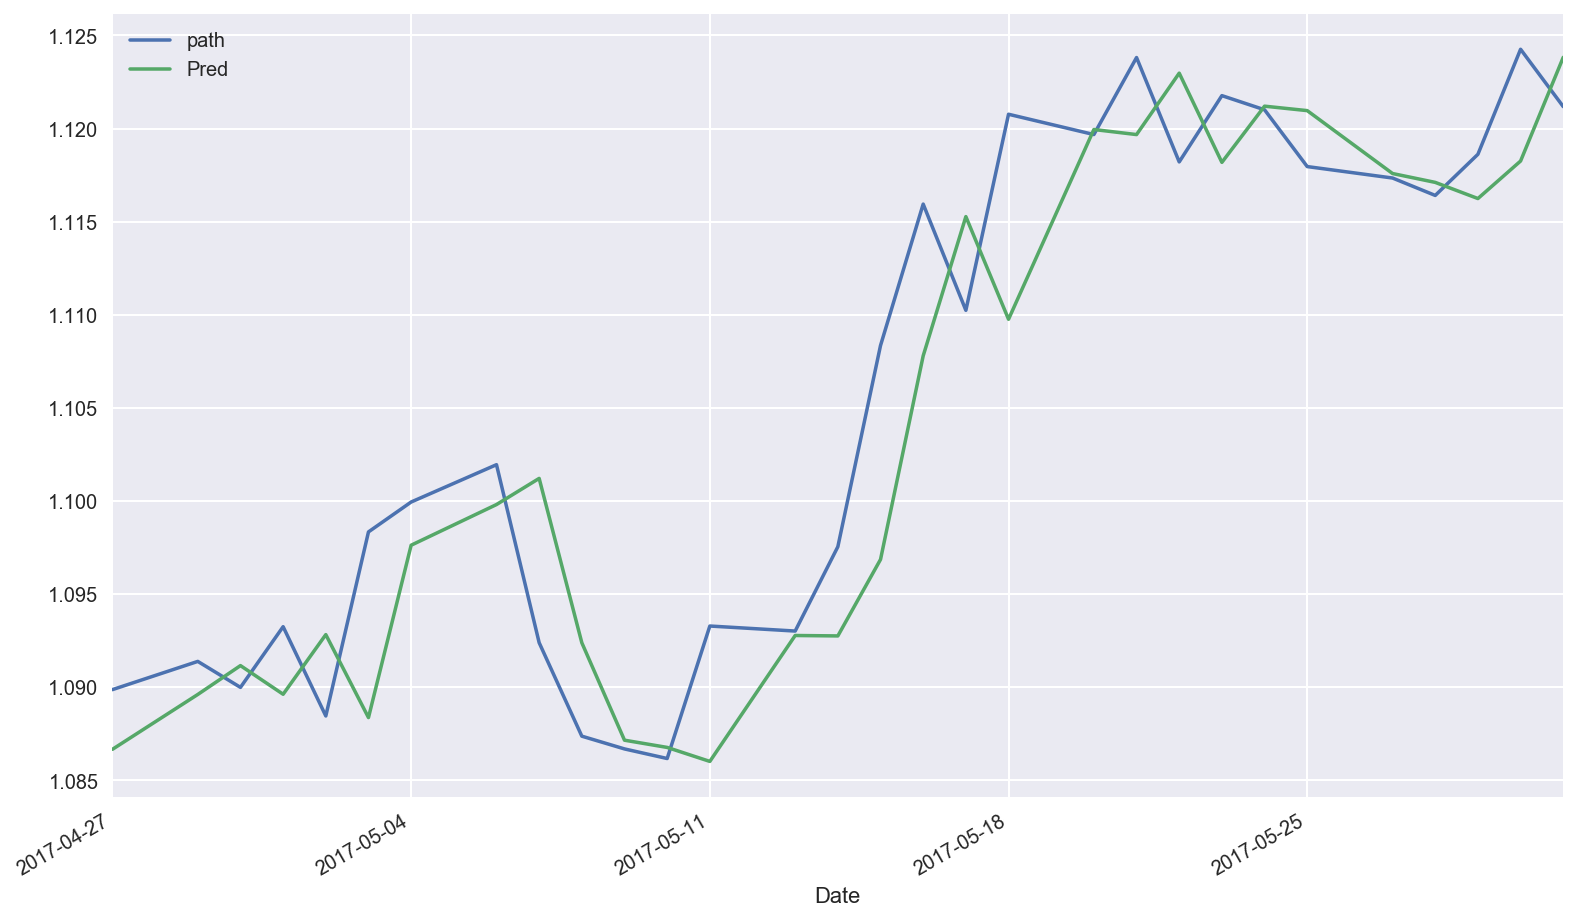

In [46]:
df['Pred'] = np.dot(df[cols], reg)
df[['path', 'Pred']].iloc[-30:].plot(figsize=(13,8));

The prediction tracks the price quite well.

<img src="http://hilpisch.com/images/finaince_logo.png" width=300px align=left>

## Prediction Based on Classification Algorithm

Can we do something more intelligent and have clear trading signals?

### The Data

In [47]:
data = pd.read_csv('../data/eurusd.csv', index_col='Date', parse_dates=True)
close_features = ['CloseAsk', 'CloseBid']
data = data[close_features]

data['Mid'] = data.mean(axis=1)
data['Returns'] = np.log(data['Mid'] / data['Mid'].shift(1))

data.dropna(inplace=True)

data = data[data.index > starting_date]

In [48]:
cols = []
lags = 5 # Increase to have better results during training (15?)
for lag in range(1, lags+1):
    col = "Lag_{}".format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
    
data.dropna(inplace=True)

In [49]:
data.head(10)

,CloseAsk,CloseBid,Mid,Returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,
2014-01-08,1.36068,1.36069,1.360685,0.002332,-1.0,-1.0,1.0,1.0,-1.0
2014-01-09,1.36701,1.36667,1.366840,0.004513,1.0,-1.0,-1.0,1.0,1.0
2014-01-11,1.36815,1.36755,1.367850,0.000739,1.0,1.0,-1.0,-1.0,1.0
2014-01-12,1.36718,1.36705,1.367115,-0.000537,1.0,1.0,1.0,-1.0,-1.0
2014-01-13,1.36797,1.36783,1.367900,0.000574,-1.0,1.0,1.0,1.0,-1.0
2014-01-14,1.36059,1.36042,1.360505,-0.005421,1.0,-1.0,1.0,1.0,1.0
2014-01-15,1.36206,1.36190,1.361980,0.001084,-1.0,1.0,-1.0,1.0,1.0
2014-01-16,1.35414,1.35359,1.353865,-0.005976,1.0,-1.0,1.0,-1.0,1.0
2014-01-18,1.35418,1.35348,1.353830,-0.000026,-1.0,1.0,-1.0,1.0,-1.0


### Logistic Regression

We could focus on the sign of the return (positive or negative returns).

In [50]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(C=1)
lm.fit(data[cols], np.sign(data['Returns']))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
print(lm.coef_)
print(lm.intercept_)

[[-0.03410344 -0.0031828  -0.12071964 -0.02167271 -0.04084084]]
[-0.13723812]


In [52]:
lm.predict(data[cols])

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [53]:
data['Prediction'] = lm.predict(data[cols])
data['Prediction'].value_counts()

-1.0    775
 1.0    280
Name: Prediction, dtype: int64

We can see the algorithm indicates a larger number of short positions than long positions. How can we translated this into executed returns? By multiplying the position sign by the return.

In [54]:
np.sign(data['Prediction'] * data['Returns']).value_counts(normalize=True)

 1.0    0.536493
-1.0    0.463507
dtype: float64

If we focus on the time series instead of the final summary...

In [55]:
data['Strategy'] = data['Prediction'] * data['Returns']

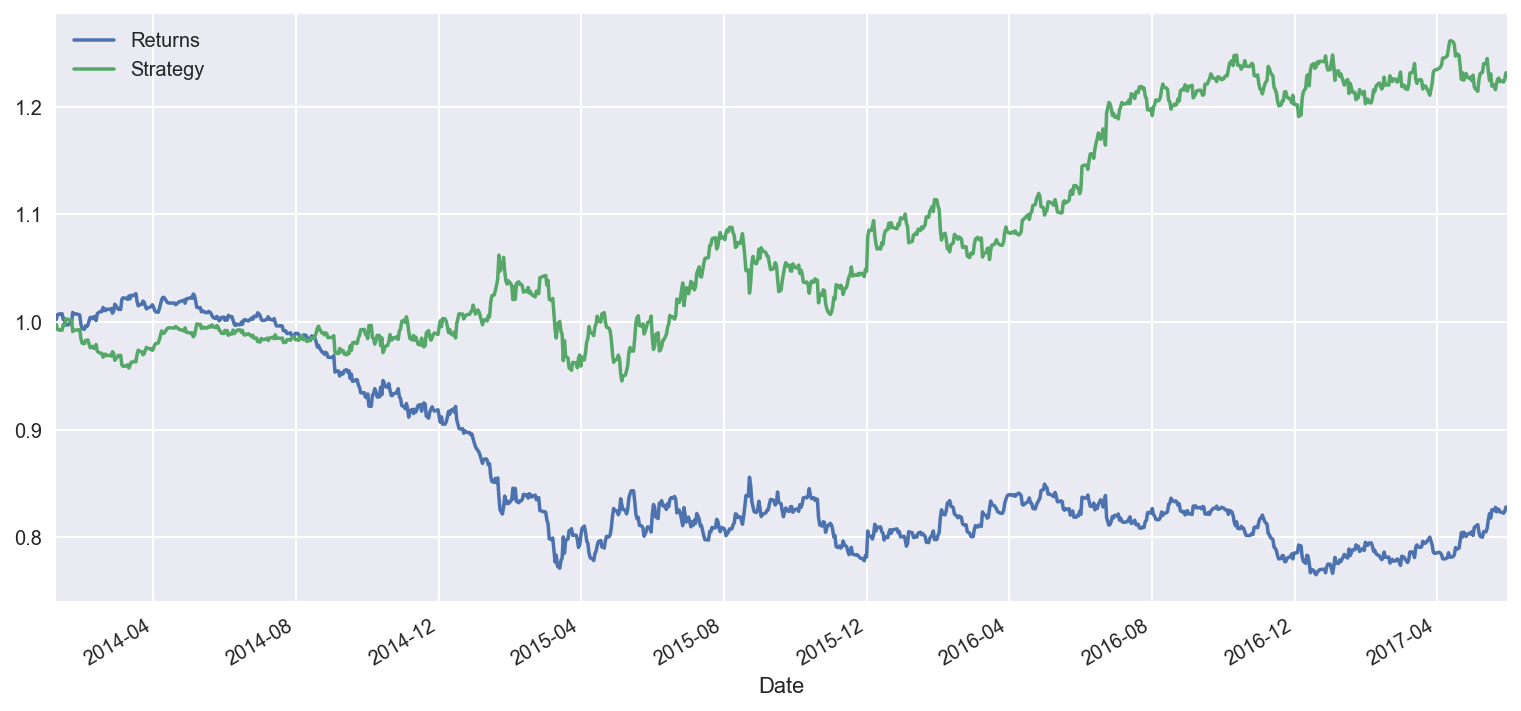

In [56]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(13,6));

Increasing the number of lags improves the returns for the strategy, as better pattern recognition takes place (using 15 lags gives arround 155%). The problem is that this applies to the historical record, of course. And we cannot trade in the past.

It doesn't say how well it would do in a real (unknown) scenario and that is what we should be checking.

## Out-of-Sample Performance

We could try with different cutoff days to create our out-of-sample time series.

In [57]:
cutoff = '2015-6-30'
#cutoff = '2015-1-1' # A worse case. This model depends heavily on the data set used for training, as we will see

### Training the Model

In [58]:
train = data.loc[data.index < cutoff].copy()

 1.0    0.535948
-1.0    0.464052
dtype: float64


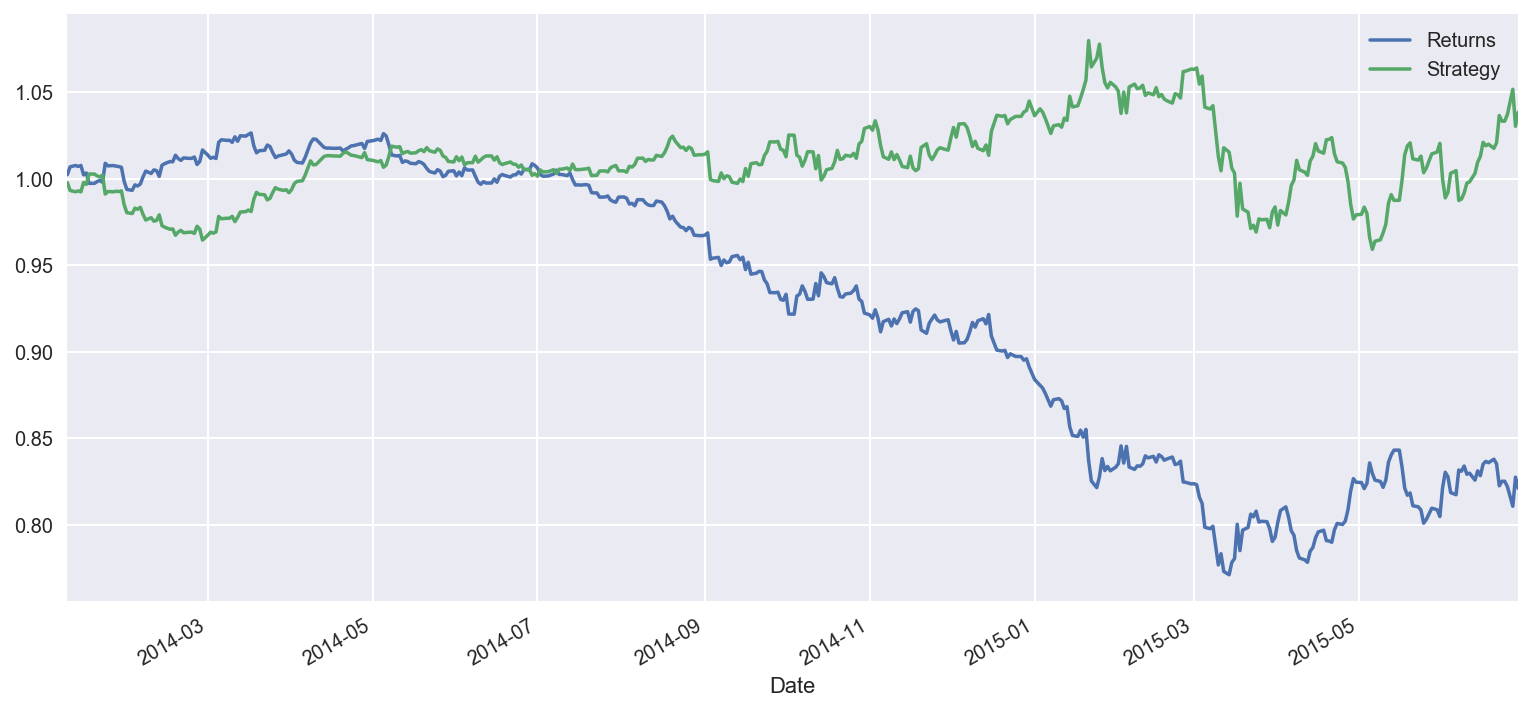

In [59]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(C=1)
lm.fit(train[cols], np.sign(train['Returns']))

train['Prediction'] = lm.predict(train[cols])
print(np.sign(train['Prediction'] * train['Returns']).value_counts(normalize=True))
train['Strategy'] = train['Prediction'] * train['Returns']

train[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(13,6));

### Testing the Model

In [60]:
test = data[data.index >= cutoff].copy()

 1.0    0.541946
-1.0    0.458054
dtype: float64


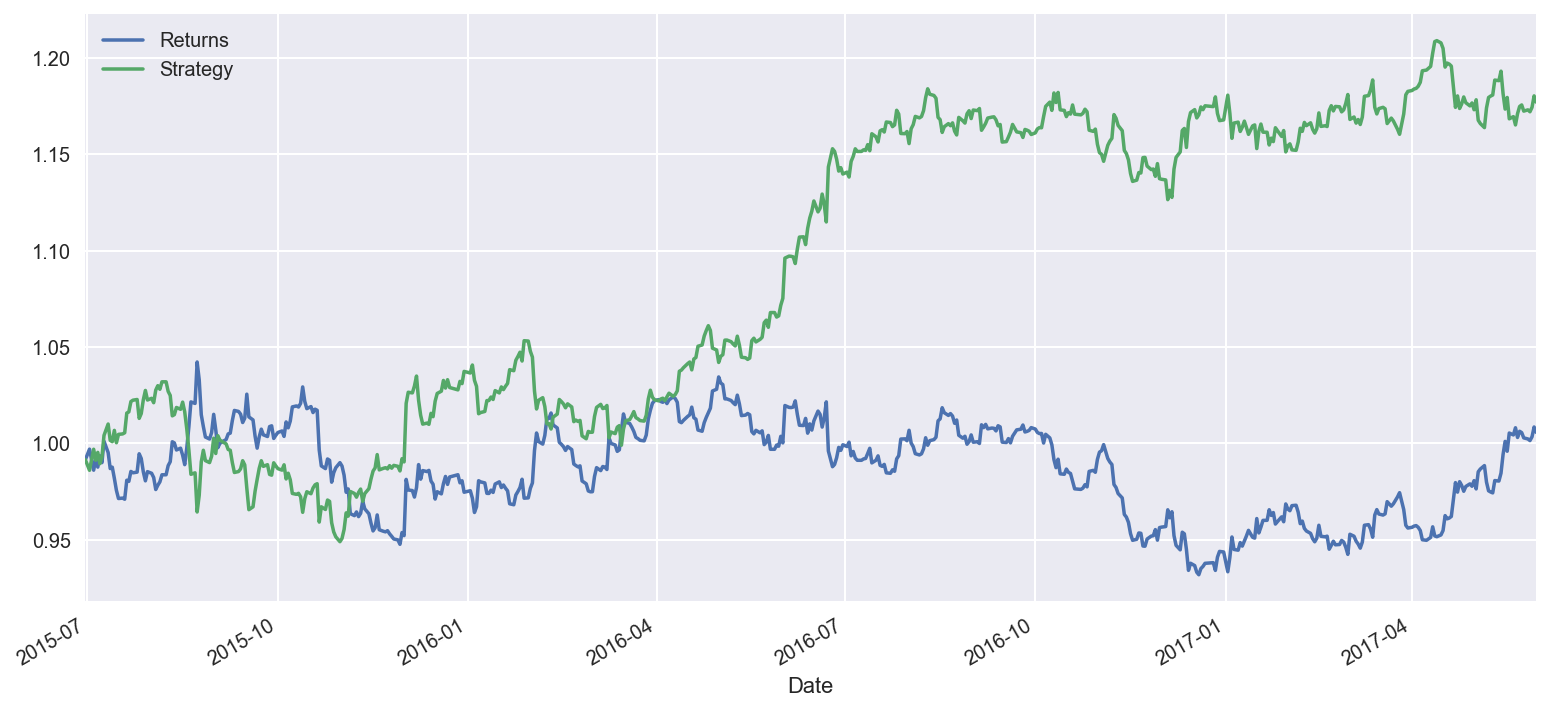

In [61]:
test['Prediction'] = lm.predict(test[cols])
print(np.sign(test['Prediction'] * test['Returns']).value_counts(normalize=True))
test['Strategy'] = test['Prediction'] * test['Returns']

test[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(13,6));

## Neural Networks from Scratch

Would a neural network produce better results, match market patterns better?

## Using TensorFlow

### The Data

In [62]:
data = pd.read_csv('../data/eurusd.csv', index_col='Date', parse_dates=True)
close_features = ['CloseAsk', 'CloseBid']
data = data[close_features]

data['Mid'] = data.mean(axis=1)
data['Returns'] = np.log(data['Mid'] / data['Mid'].shift(1))

data.dropna(inplace=True)

data = data[data.index > starting_date]

In [63]:
cols = []
lags = 5 # Increase to have better results during training (15?)
for lag in range(1, lags+1):
    col = "Lag_{}".format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
    
data.dropna(inplace=True)

In [64]:
data.head(10)

,CloseAsk,CloseBid,Mid,Returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,
2014-01-08,1.36068,1.36069,1.360685,0.002332,-1.0,-1.0,1.0,1.0,-1.0
2014-01-09,1.36701,1.36667,1.366840,0.004513,1.0,-1.0,-1.0,1.0,1.0
2014-01-11,1.36815,1.36755,1.367850,0.000739,1.0,1.0,-1.0,-1.0,1.0
2014-01-12,1.36718,1.36705,1.367115,-0.000537,1.0,1.0,1.0,-1.0,-1.0
2014-01-13,1.36797,1.36783,1.367900,0.000574,-1.0,1.0,1.0,1.0,-1.0
2014-01-14,1.36059,1.36042,1.360505,-0.005421,1.0,-1.0,1.0,1.0,1.0
2014-01-15,1.36206,1.36190,1.361980,0.001084,-1.0,1.0,-1.0,1.0,1.0
2014-01-16,1.35414,1.35359,1.353865,-0.005976,1.0,-1.0,1.0,-1.0,1.0
2014-01-18,1.35418,1.35348,1.353830,-0.000026,-1.0,1.0,-1.0,1.0,-1.0


### Importing and Verbosity

In [65]:
import tensorflow as tf

In [66]:
# TensorFlow can be really verbose
tf.logging.set_verbosity(tf.logging.ERROR)

### Features and Labels

In [67]:
fc = tf.contrib.layers.real_valued_column('lags', dimension=lags)

In [68]:
def get_data():
    fc = {'lags': tf.constant(np.where(data[cols].values > 0, 1, 0))}
    la = tf.constant(np.where(data['Returns'].values > 0, 1, 0))
    return fc, la

### The DNN Classifier Model

In [69]:
model = tf.contrib.learn.DNNClassifier(hidden_units=[50,50], feature_columns=[fc])
model

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x13443b9b0>, 'hidden_units': [50, 50], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=5, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x13187cea0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

### The Deep Learning

In [70]:
model.fit(input_fn=get_data, steps=50)

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x13443b9b0>, 'hidden_units': [50, 50], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=5, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x13187cea0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

### Prediction

In [71]:
list(model.predict(input_fn=get_data))[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [72]:
model.evaluate(input_fn=get_data, steps=1)

{'accuracy': 0.53175354,
 'accuracy/baseline_label_mean': 0.46919432,
 'accuracy/threshold_0.500000_mean': 0.53175354,
 'auc': 0.54276335,
 'global_step': 50,
 'labels/actual_label_mean': 0.46919432,
 'labels/prediction_mean': 0.46782631,
 'loss': 0.68811429,
 'precision/positive_threshold_0.500000_mean': 0.50485438,
 'recall/positive_threshold_0.500000_mean': 0.1050505}

In [73]:
data['Prediction'] = np.where(np.array(list(model.predict(input_fn=get_data))) > 0, 1, -1)

### Backtesting

In [74]:
data['Strategy'] = data['Prediction'] * data['Returns']

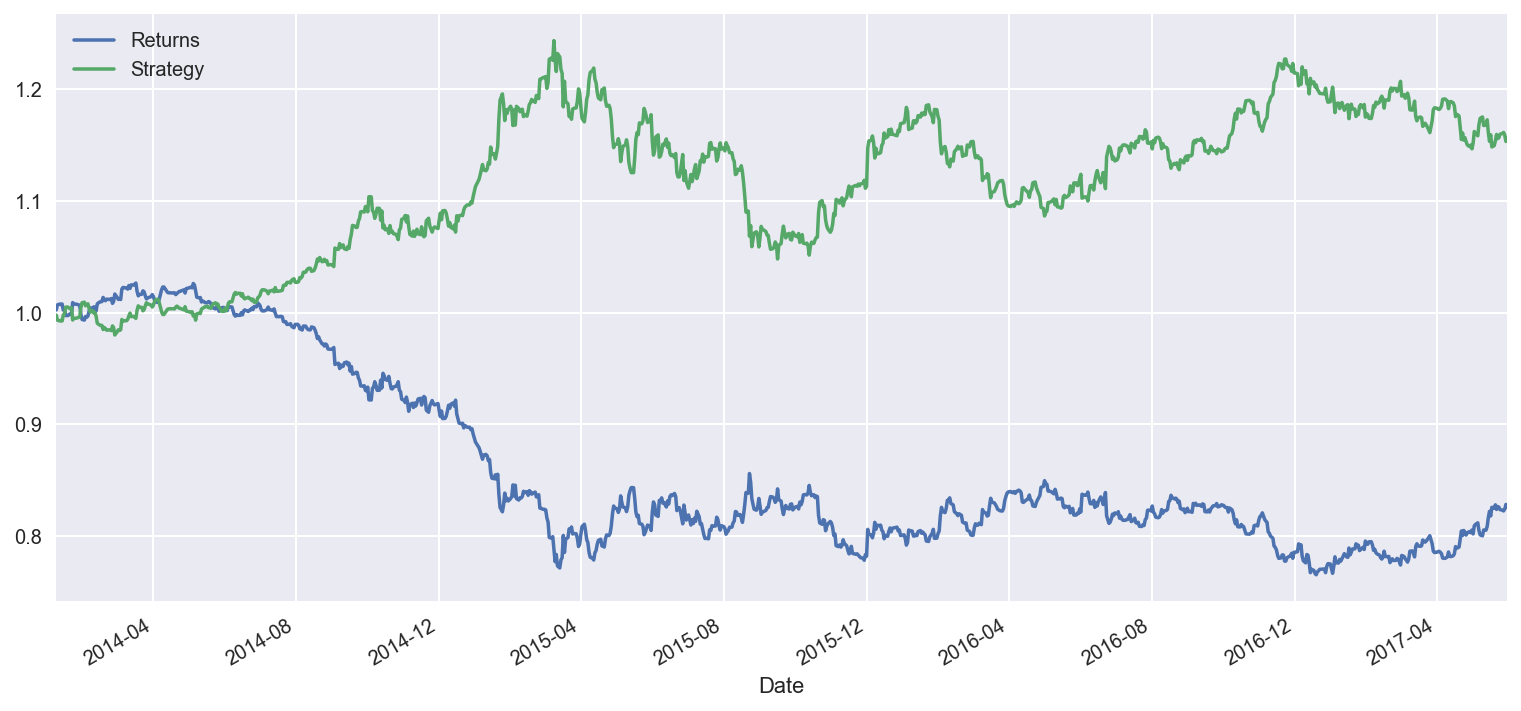

In [75]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(13,6));

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>